# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('telecom_users.csv', decimal=',', index_col=0)
# ID нам бесполезен
data = data.drop(['customerID'], axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No
4528,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.9,238.5,No
432,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [18]:
print('Общее количество строк ->', data.shape[0])
print('Общее количество столбцов ->', data.shape[1])

Общее количество строк -> 5986
Общее количество столбцов -> 20


In [19]:
# В данном датасете нету пропущенных значений
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            5986 non-null   object
 1   SeniorCitizen     5986 non-null   int64 
 2   Partner           5986 non-null   object
 3   Dependents        5986 non-null   object
 4   tenure            5986 non-null   int64 
 5   PhoneService      5986 non-null   object
 6   MultipleLines     5986 non-null   object
 7   InternetService   5986 non-null   object
 8   OnlineSecurity    5986 non-null   object
 9   OnlineBackup      5986 non-null   object
 10  DeviceProtection  5986 non-null   object
 11  TechSupport       5986 non-null   object
 12  StreamingTV       5986 non-null   object
 13  StreamingMovies   5986 non-null   object
 14  Contract          5986 non-null   object
 15  PaperlessBilling  5986 non-null   object
 16  PaymentMethod     5986 non-null   object
 17  MonthlyCharg

In [ ]:
pd.to

In [151]:
source_df = data.copy()
# MonthlyCharges и TotalCharges имеют тип object, а SeniorCitizen наоборот имеет тип int64, так что исправм это
def change_type(dataset, feature_cols, type_to_change):
    """
    Изменим тип фич на требуемый нам
    dataset (DataFrame): DataFrame где необходимо поменять тип
    feature_cols (list) : список необходимых фич
    type_to_change: требуемый тип данных
    """
    if type_to_change == 'object':
        for col in feature_cols:
            dataset[col] = dataset[col].astype('object')
    elif type_to_change in ['int64', 'int32', 'int', 'float']:
        for col in feature_cols:
            dataset[col] = pd.to_numeric(dataset[col], errors='coerce')
    else:
        raise TypeError('Для этой курсовой только в эти типы преобразуем =)')
    
    return dataset

change_type(source_df, ['TotalCharges', 'MonthlyCharges'], 'int')
change_type(source_df, ['SeniorCitizen'], 'object')
source_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   object 
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object

In [51]:
cat_columns = source_df.columns[source_df.dtypes == 'object'].tolist()
num_columns = source_df.columns[source_df.dtypes != 'object'].tolist()
print('Категориальные признаки ->', cat_columns)
print('')
print('Количественные признаки ->', num_columns)

Категориальные признаки -> ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Количественные признаки -> ['tenure', 'MonthlyCharges', 'TotalCharges']


In [57]:
# Можем заметить, что в колонке TotalCharges появилось 10 пустых значений, взглянем на них
source_df[source_df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


In [60]:
# Заполняем нулями пропущенные значения (до этого я так понимаю это были отсутсввующие значения, не 0)
source_df['TotalCharges'].fillna(0, inplace=True)
print('Пропущенных значений в TotalCharges: ', source_df['TotalCharges'].isna().sum())

Пропущенных значений в TotalCharges:  0


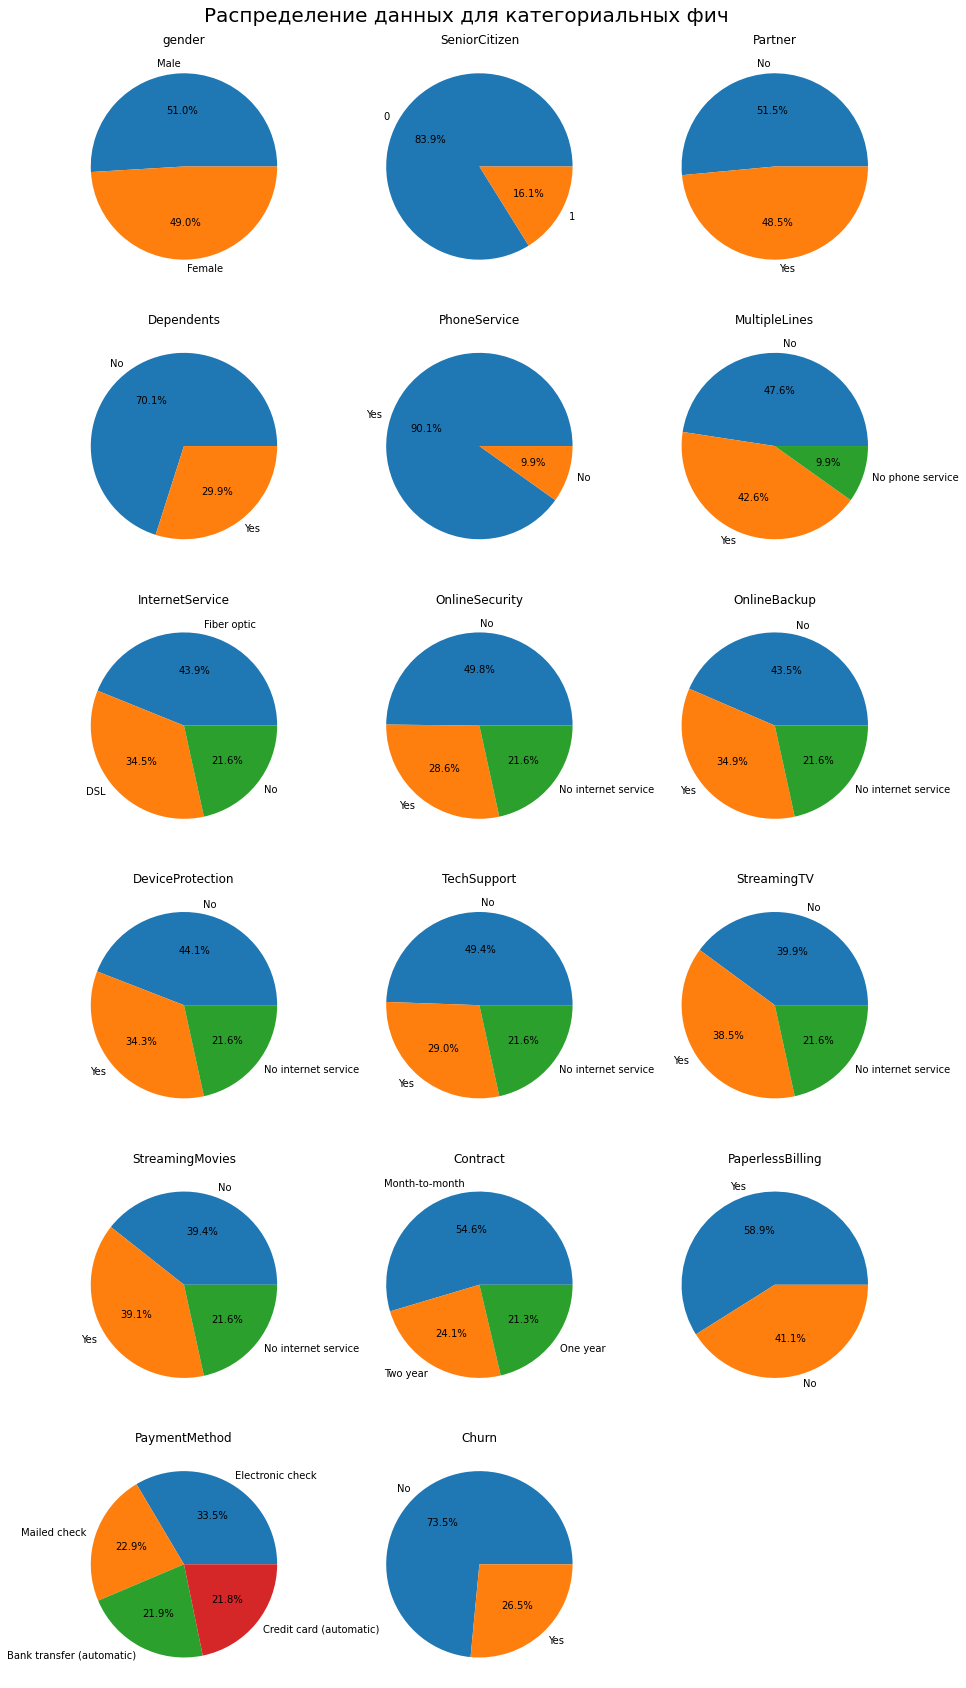

In [122]:
# Взглянем на категориальные данные
fig, ax = plt.subplots(6, 3, figsize=(15, 30))
count = 0
for x_dim in range(6):
    for y_dim in range(3):
        df_tmp = source_df[cat_columns[count]].value_counts()
        ax[x_dim, y_dim].pie(df_tmp, labels=df_tmp.index, autopct='%1.1f%%')
        ax[x_dim, y_dim].set_title(cat_columns[count])
        count += 1
        if count > len(cat_columns) - 1:
            break
            
plt.suptitle("Распределение данных для категориальных фич", fontsize=20,  x=.5,y=.9)
del df_tmp
ax[5,2].remove()
plt.show()

In [119]:
# Ушедших пользователей всего 26.5% -> датасет не сбалансирован

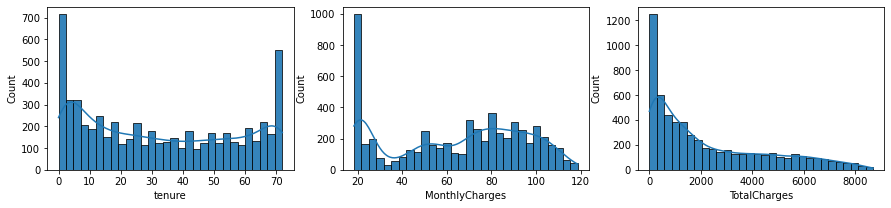

In [120]:
# Теперь посмотрим на распределение численных фич
fig, ax = plt.subplots(1,3, figsize=(15,3))
counter = 0
for col in source_df[num_columns]:
    sns.histplot(source_df[col],kde=True, bins=30, ax=ax[counter], label=col, alpha=0.9)
    counter+=1


In [121]:
# Никакая из величин не имеет нормального распределения, tenure похож на бимодальное распределение,
# а TotalCharges имеет длинных хвост

# 2. Исследование зависимостей и формулирование гипотез

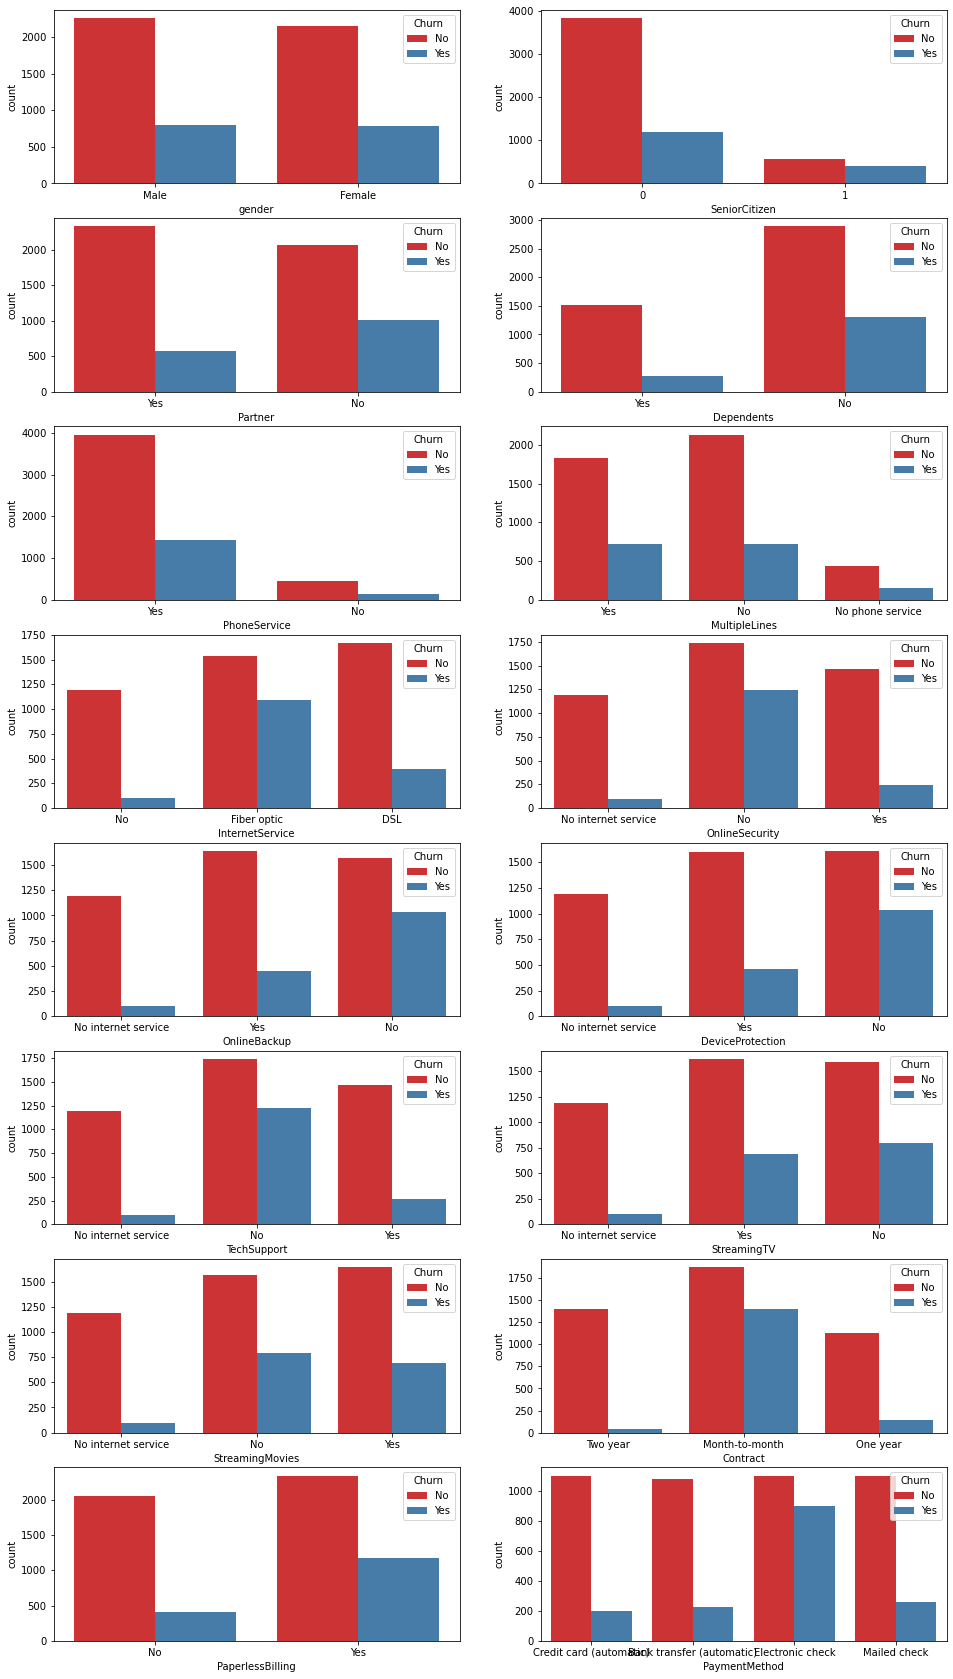

In [143]:
# Для начала взглянем на зависимость оттока от категориальных признаков
fig, ax = plt.subplots(8, 2, figsize=(16, 30))
count = 0
for x_dim in range(8):
    for y_dim in range(2):
        sns.countplot(data=source_df, x=cat_columns[count], hue='Churn',
                       ax=ax[x_dim,y_dim], palette="Set1")
        count += 1
plt.show()

In [146]:
source_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5191,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5226,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5390,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


### Выводы для категориальных признаков: 
     1)gender – пол клиента (male/female)
         Как видим отток клиентов не зависит от пола
     2)SeniorCitizen – яляется ли клиент пенсионером (1, 0)
         Пенсионеры реже отказываются от услуг компании
     3)Partner – состоит ли клиент в браке (Yes, No)
         От семейного положения разница не велика
     4)Dependents – есть ли у клиента иждивенцы (Yes, No)
         Процент оттока клиентов если есть на попечении иждевенцы ниже
     5)PhoneService – подключена ли услуга телефонной связи (Yes, No)
         Процентный отток клиентов примерно одинаков от того подключена услуга связи или нет
     6)MultipleLines – подключены ли несколько телефонных линий (Yes, No, No phone service)
         Если подключены несколько телефонных линий процекнт оттока клиентов ниже чем если не подключены несколько телефонных линий
     7)InternetService – интернет-провайдер клиента (DSL, Fiber optic, No)
         Самый низкий отток клиентов если они не пользуются интернетом, так же следует заметить что процент оттока клиентов те кто испольтзуют оптоволокно выше чем у тех кто использует DSL
     8, 9, 10, 11)OnlineSecurity – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)
     OnlineBackup – подключена ли услуга online backup (Yes, No, No internet service)
     DeviceProtection – есть ли у клиента страховка оборудования (Yes, No, No internet service)
     TechSupport – подключена ли услуга технической поддержки (Yes, No, No internet service)
         Во всех допольнительных сервисах ситуация похожая. Процент оттока выше у тех пользователей кто не пользуются допольнительными опциями предоставляемыми компанией
     12, 13)StreamingTV – подключена ли услуга стримингового телевидения (Yes, No, No internet service)
     StreamingMovies – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)
             В этих категориях довольно похожий процент оттока внезависимости от того пользуется ли клиент стриминговыми сервисами или нет
     14)Contract – тип контракта клиента (Month-to-month, One year, Two year)
         Наибольший процент оттока у тех кто пользуются интернетом с помесячной оплатой
     15)PaperlessBilling – пользуется ли клиент безбумажным биллингом (Yes, No)
         Те кто пользуются безбумажным билингом чаще прекращают пользоваться услугами компании
     16)PaymentMethod – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
     Саммый большой процент оттока у тех кто оплачивает услуги онлайн, те кто оплачивает автоматически процент оттока наиболее низкий

<AxesSubplot:title={'center':'Some info'}>

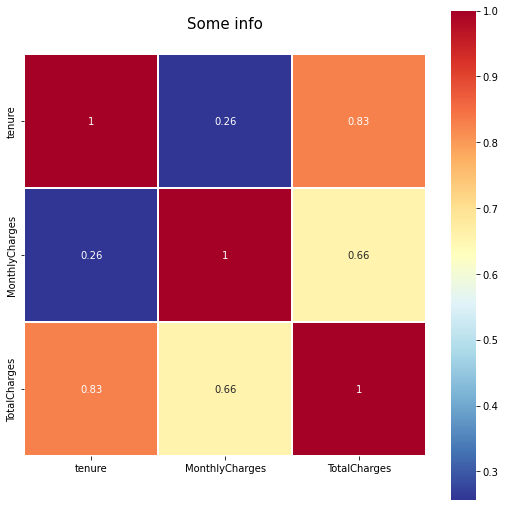

In [149]:
# Посмтроим корреляционную матрицу для числовых признаков
plt.figure(figsize=(9,9))
plt.title('Some info', y=1.05, size=15)
sns.heatmap(source_df.corr(), linewidths=0.1,vmax=1.0, 
            square=True, cmap="RdYlBu_r", linecolor='white', annot=True)

### Выводы для числовых признаков:
    Заметна высокая корреляция между tenure(кол-во месяцев человек явлется клиентом компании) и TotalCharges(сколько всего заплатил за все время), так же между TotalCharges и MontlyCharges(месячный размер оплаты на данный момент)
    P.S. Что логично что эти переменные связаны между собой даже исходя из названия =)

# 3. Построение моделей для прогнозирования оттока

In [152]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [150]:
# Так как в данной задаче бинарной классификации количество клиентов ушедших и оставшихся не одинаковое, 
# следовательно нам будет необходимо использовать метрики качества такие как f1 score и roc_auc

In [154]:
def compreasion_models(model, X_test, y_test):
    """
    Функция для наглядного сравнения моделей 
    по метрикам roc-auc и f1 score
    model: модель для сравнения
    X_test (DataFrame)
    y_test (DataFrame)
    """
    metrics = {}
    metric['f1_score'] = f1_score(y_test, model.predict(X_test))
    if hasattr(model,'predict_proba'):
        metrics['ROC_AUC'] = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    else:
        metrics['ROC_AUC'] = roc_auc_score(y_test, model.predict(X_test))
    return pd.DataFrame(metrics, index=[model])

In [ ]:
data_opt = deepcopy(data)

data_opt.gender.replace({'Male':0, 'Female':1}, inplace=True)
data_opt.Partner.replace({'No':0, 'Yes':1}, inplace=True)
data_opt.Dependents.replace({'No':0, 'Yes':1}, inplace=True)
data_opt.PhoneService.replace({'No':0, 'Yes':1}, inplace=True)
data_opt.MultipleLines.replace({'No':1, 'Yes':2, 'No phone service': 0}, inplace=True)
data_opt.InternetService.replace({'No':0, 'Fiber optic':1, 'DSL': 2}, inplace=True)
data_opt.OnlineSecurity.replace({'No':1, 'Yes':2, 'No internet service': 0}, inplace=True)
data_opt.OnlineBackup.replace({'No':1, 'Yes':2, 'No internet service': 0}, inplace=True)
data_opt.DeviceProtection.replace({'No':1, 'Yes':2, 'No internet service': 0}, inplace=True)
data_opt.TechSupport.replace({'No':1, 'Yes':2, 'No internet service': 0}, inplace=True)
data_opt.StreamingTV.replace({'No':1, 'Yes':2, 'No internet service': 0}, inplace=True)
data_opt.StreamingMovies.replace({'No':1, 'Yes':2, 'No internet service': 0}, inplace=True)
data_opt.Contract.replace({'One year':1, 'Two year':2, 'Month-to-month': 0}, inplace=True)
data_opt.PaperlessBilling.replace({'No':0, 'Yes':1}, inplace=True)
data_opt.PaymentMethod.replace({'Electronic check':1, 'Credit card (automatic)':2, 'Mailed check': 0, 'Bank transfer (automatic)':3}, inplace=True)
data_opt.Churn.replace({'No':0, 'Yes':1}, inplace=True)
data_opt.MonthlyCharges.astype('float64')

# data_opt.TotalCharges.replace({data_opt.TotalCharges < 450})

data_opt['TotalCharges'].replace(' ', np.nan, inplace=True)
data_opt.dropna(subset=['TotalCharges'], inplace=True)
data_opt.TotalCharges = data_opt.TotalCharges.astype('float64')
data_opt.drop(['customerID'], axis=1, inplace=True)
data_opt.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,0,0,1,1,72,1,2,0,0,0,0,0,0,0,2,0,2,24.1,1734.65,0
4528,1,0,0,0,44,1,1,1,1,2,2,1,2,1,0,1,2,88.15,3973.20,0
6344,1,1,1,0,38,1,2,1,1,1,1,1,1,1,0,1,3,74.95,2869.85,1
6739,0,0,0,0,4,1,1,2,1,1,1,1,1,2,0,1,1,55.9,238.50,0
432,0,0,0,0,2,1,1,2,2,1,2,1,1,1,0,0,1,53.45,119.50,0


In [ ]:
data_opt.loc[ data_opt['TotalCharges'] <= 450, 'TotalCharges'] = 0
data_opt.loc[(data_opt['TotalCharges'] > 450) & (data_opt['TotalCharges'] <= 1420), 'TotalCharges'] = 1
data_opt.loc[(data_opt['TotalCharges'] > 1420) & (data_opt['TotalCharges'] <= 3850), 'TotalCharges']   = 2
data_opt.loc[ data_opt['TotalCharges'] > 3850, 'TotalCharges'] = 3
data_opt['TotalCharges'] = data_opt['TotalCharges'].astype(int)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_opt[['tenure']] = scaler.fit_transform(data_opt[['tenure']])

In [ ]:
data_opt.MonthlyCharges = data_opt.MonthlyCharges.astype('float')
data_opt.MonthlyCharges.describe()

count    5976.000000
mean       64.846687
std        30.107576
min        18.250000
25%        35.750000
50%        70.425000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [ ]:
    data_opt.loc[ data_opt['MonthlyCharges'] <= 30, 'MonthlyCharges'] = 0
    data_opt.loc[(data_opt['MonthlyCharges'] > 30) & (data_opt['MonthlyCharges'] <= 70), 'MonthlyCharges'] = 1
    data_opt.loc[(data_opt['MonthlyCharges'] > 70) & (data_opt['MonthlyCharges'] <= 90), 'MonthlyCharges']   = 2
    data_opt.loc[ data_opt['MonthlyCharges'] > 90, 'MonthlyCharges'] = 3
    data_opt['MonthlyCharges'] = data_opt['MonthlyCharges'].astype(int)

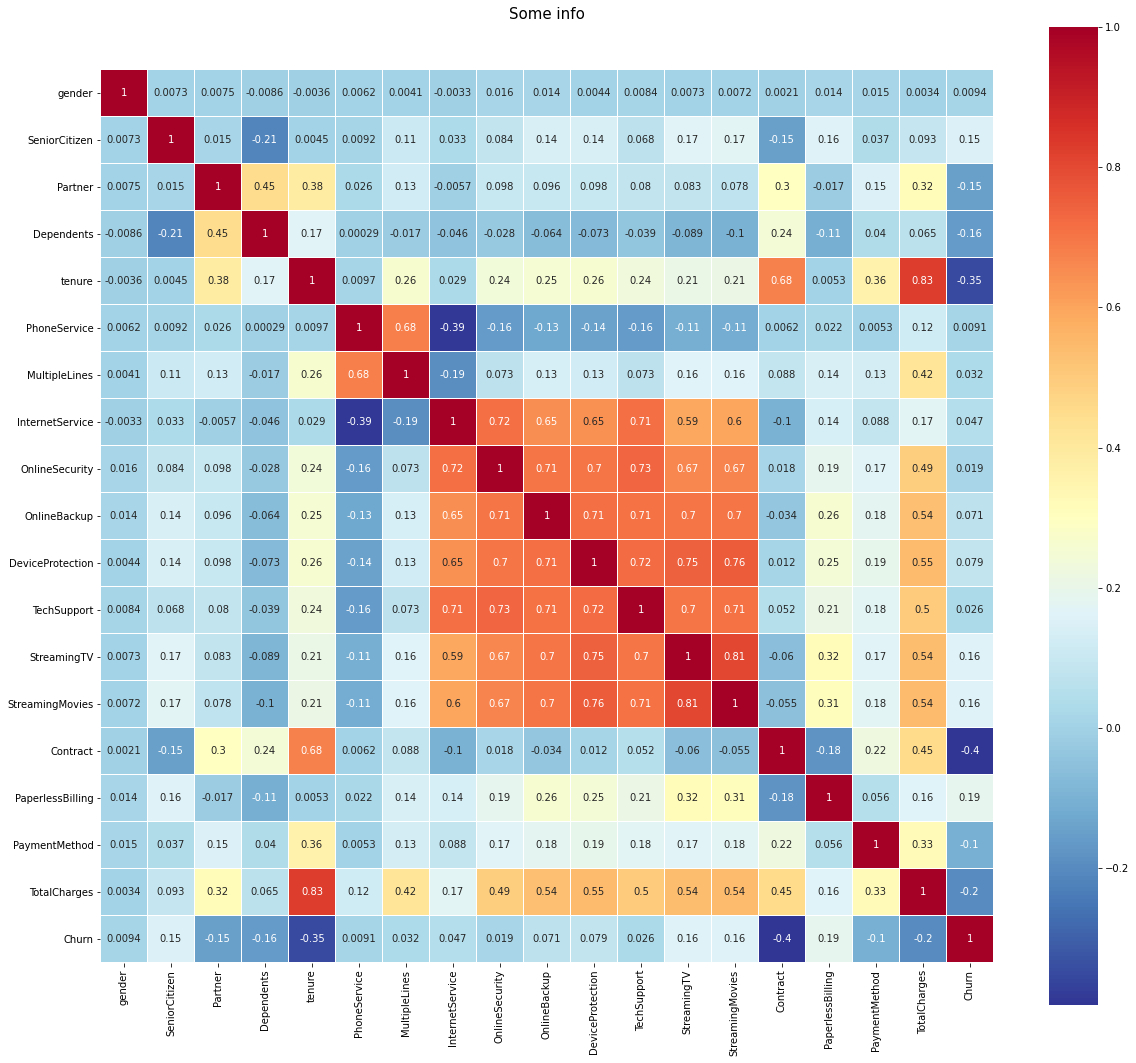

In [ ]:
plt.figure(figsize=(20,18))
plt.title('Some info', y=1.05, size=15)
sns.heatmap(data_opt.corr(), linewidths=0.1,vmax=1.0, 
            square=True, cmap="RdYlBu_r", linecolor='white', annot=True)

Наибольшую корреляцию можно наблюдать между Churn и Contract, Churn и tenure

# 3. Построение моделей для прогнозирования оттока

In [ ]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
Y = np.array(data_opt['Churn'])
X = data_opt.drop(['Churn'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
parameters = {"C": np.arange(0, 5, 0.05), "penalty" : ['l2', 'l1']}
log_reg = GridSearchCV(log_reg, parameters, n_jobs=-1, cv=5)
fit_log_reg = log_reg.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(fit_log_reg.best_params_)

# pred_log_reg = fit_log_reg.predict_proba(X_test)
# pred_log_reg = pred_log_reg[:, 1]
# # calculate AUC
# auc = roc_auc_score(pred_log_reg, probs)
# print(auc)

Best parameters set found on development set:

{'C': 0.8500000000000001, 'penalty': 'l2'}
0.7552940334811847


In [ ]:
pred_log_reg = fit_log_reg.predict_proba(X_test)
pred_log_reg = pred_log_reg[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, pred_log_reg)
print(auc)

0.8354271812275206


In [ ]:
RFC = RandomForestClassifier(n_jobs=-1, random_state=42)
parameters = {'n_estimators': range(10, 300, 10), 'min_samples_leaf': range(1, 5)}
clf_rfc = GridSearchCV(RFC, parameters, n_jobs=-1, cv=5)
RFC_fit = clf_rfc.fit(X_train, y_train)
print(RFC_fit)

print("Best parameters set found on development set:")
print()
# print(RFC_fit.best_params_)
# RFC_pred = RFC_fit.predict(X_test)

# print(roc_auc_score(RFC_pred, y_test))

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [ ]:
pred_rfc = RFC_fit.predict_proba(X_test)
pred_rfc = pred_rfc[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, pred_rfc)
print(auc)

0.8426713510848126


In [ ]:
SVC_model = SVC(gamma='scale')
parameters = {'C': np.arange(1, 20, 0.5), 'kernel': ['linear', 'rbf']}
clf = GridSearchCV(SVC_model, parameters, n_jobs=-1, cv=5)
SVC_fit = clf.fit(X_train, y_train)
print(SVC_fit.best_params_)

print(SVC_fit)
SVC_pred = SVC_fit.predict(X_test)
print(roc_auc_score(SVC_pred, y_test))

{'C': 2.5, 'kernel': 'rbf'}
GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5]),
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.7651486471960105


In [ ]:
SVC_model = SVC(gamma='scale', probability=True, C=2.5, kernel='rbf')
SVC_fit = SVC_model.fit(X_train, y_train)
pred_svc = SVC_fit.predict_proba(X_test)
pred_svc = pred_svc[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, pred_svc)
print(auc)

0.803870808678501


In [ ]:
gauss = GaussianNB()
gauss_fit = gauss.fit(X_train, y_train)

print(gauss_fit)
gauss_pred = gauss_fit.predict_proba(X_test)
gauss_pred = gauss_pred[:, 1]
auc = roc_auc_score(y_test, gauss_pred)
print(auc)

GaussianNB(priors=None, var_smoothing=1e-09)
0.8270082811231001


In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
parameters = {}
clf = GridSearchCV(knn, parameters, n_jobs=-1, cv=5)
knn_fit = clf.fit(X_train, y_train)
print(knn_fit.best_params_)

print(knn_fit)
knn_pred = knn_fit.predict(X_test)
print(roc_auc_score(knn_pred, y_test))

{}
GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=2, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.6668056327589402


In [ ]:
knn_pred = knn_fit.predict_proba(X_test)
knn_pred = knn_pred[:, 1]
auc = roc_auc_score(y_test, knn_pred)
print(auc)

0.7227056503074604


In [ ]:
for k in range(2, 50):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn_fit = knn.fit(X_train, y_train)
  knn_pred = knn_fit.predict_proba(X_test)
  knn_pred = knn_pred[:, 1]
  auc = roc_auc_score(y_test, knn_pred)
  print(k, auc)

2 0.7227056503074604
3 0.7558029498781762
4 0.7756772827474185
5 0.7800698311869126
6 0.7832477665622462
7 0.7841741356305836
8 0.7889818279382759
9 0.7931532080287735
10 0.8011950342267085
11 0.807066872607031
12 0.8129060795916
13 0.8148512733495765
14 0.8168490399118227
15 0.8160586349924586
16 0.8191513661677688
17 0.8201828808446455
18 0.8246479434969254
19 0.8245826807054184
20 0.8281467542638357
21 0.8275358220211162
22 0.8251319758672699
23 0.8251791101055805
24 0.8257646623738253
25 0.8280724271957303
26 0.827272957999768
27 0.8275865819700661
28 0.827688101867966
29 0.8265605058591483
30 0.8273400336465948
31 0.8272185723401787
32 0.8272965251189233
33 0.8281395028425571
34 0.8283642969021928
35 0.8280996200255251
36 0.8288175107321035
37 0.8283787997447499
38 0.8286126580809838
39 0.8293087945237267
40 0.8283280397957998
41 0.8305524132730016
42 0.8302043450516302
43 0.8305433489964033
44 0.8299487324515605
45 0.829560781413157
46 0.8287522479405964
47 0.8289571005917159
48 

# 4. Сравнение качества моделей 

In [ ]:
### YOUR CODE HERE ###




In [ ]:
classifiers123 = [
    KNeighborsClassifier(n_neighbors=2),
    SVC(C=2.5, kernel='rbf', probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(min_samples_leaf=4, n_estimators=280),
    GaussianNB(),
    ]

In [ ]:
log_cols=["Classifier", "roc_auc_score"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    
    train_predictions = clf.predict(X_test)
    ll = roc_auc_score(y_test, train_predictions)
    print("roc auc score: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
roc auc score: 0.6044494720965309
SVC
****Results****
roc auc score: 0.7056938159879337
NuSVC
****Results****
roc auc score: 0.677790346907994
DecisionTreeClassifier
****Results****
roc auc score: 0.6594079939668175
RandomForestClassifier
****Results****
roc auc score: 0.6989064856711916
AdaBoostClassifier
****Results****
roc auc score: 0.7174773755656109
GradientBoostingClassifier
****Results****
roc auc score: 0.7127639517345399
GaussianNB
****Results****
roc auc score: 0.7491515837104072
LinearDiscriminantAnalysis
****Results****
roc auc score: 0.6973981900452488
QuadraticDiscriminantAnalysis
****Results****
roc auc score: 0.7586726998491705
LogisticRegression
****Results****
roc auc score: 0.7070135746606335


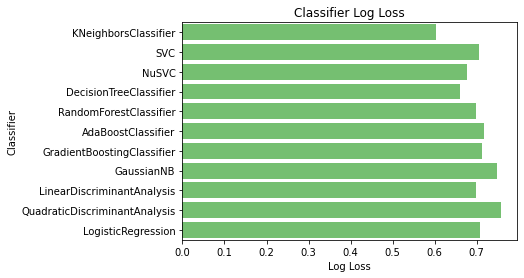

In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='roc_auc_score', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [ ]:
roc_auc_score(test_predictions, y_test)

0.7216457532705982

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
level0 = []
level0.append(('knn', KNeighborsClassifier(n_neighbors=2)))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC(C=2.5, kernel='rbf', probability=True)))
level0.append(('bayes', GaussianNB()))
level0.append(('rfc', RandomForestClassifier(min_samples_leaf=4, n_estimators=280)))
level0.append(('nusvc', NuSVC(probability=True)))
level0.append(('dtc', DecisionTreeClassifier()))
level0.append(('abc', AdaBoostClassifier()))
level0.append(('gbc', GradientBoostingClassifier()))
level0.append(('lda', LinearDiscriminantAnalysis()))
level0.append(('qda', QuadraticDiscriminantAnalysis()))

level1 = LogisticRegression(C=0.8500000000000001, penalty='l2')
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [ ]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [ ]:

models = dict()
models['lr'] = LogisticRegression(C=0.8500000000000001, penalty='l2')
models['knn'] = KNeighborsClassifier(n_neighbors=2)
models['cart'] = DecisionTreeClassifier()
models['svm'] = SVC(C=2.5, kernel='rbf', probability=True)
models['bayes'] = GaussianNB()
models['rfc'] = RandomForestClassifier(min_samples_leaf=4, n_estimators=280)
models['nusvc'] = NuSVC(probability=True)
models['dtc'] = DecisionTreeClassifier()
models['abc'] = AdaBoostClassifier()
models['gbc'] = GradientBoostingClassifier()
models['lda'] = LinearDiscriminantAnalysis()
models['qda'] = QuadraticDiscriminantAnalysis()
models['stacking'] = model
models

{'abc': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=None),
 'bayes': GaussianNB(priors=None, var_smoothing=1e-09),
 'cart': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'dtc': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0,

In [ ]:
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f' % (name, mean(scores)))

>lr 0.787
>knn 0.746
>cart 0.722
>svm 0.793
>bayes 0.737
>rfc 0.798
>nusvc 0.786
>dtc 0.720
>abc 0.798
>gbc 0.797
>lda 0.785
>qda 0.766
>stacking 0.792


In [ ]:
# Boosting

In [ ]:
level10 = deepcopy(level0)

In [ ]:
model = StackingClassifier(estimators=level10, final_estimator=level1, cv=5)

In [ ]:
model

StackingClassifier(cv=5,
                   estimators=[('knn',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=2,
                                                     p=2, weights='uniform')),
                               ('cart',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
              

In [ ]:
level123 = []
level123.append(('rfc', RandomForestClassifier(min_samples_leaf=4, n_estimators=280)))
level123.append(('abc', AdaBoostClassifier()))
level123.append(('gbc', GradientBoostingClassifier()))

In [ ]:
level123

[('rfc',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=4, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=280,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False)),
 ('abc',
  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                     n_estimators=50, random_state=None)),
 ('gbc',
  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                             learning_rate=0.1, loss='deviance', max_depth=3,
                             max_features=None, max_leaf_nodes=None,
                             min_impuri

In [ ]:
import xgboost as xgb

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_test,label=y_test)

In [ ]:
xg_reg = xgb.XGBClassifier(learning_rate = 0.5,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [ ]:
roc_auc_score(preds, y_test)

0.7130733116648611

In [ ]:
res = []
i = 0
for lr in np.arange(0.1, 5.0, 0.1):
  for md in np.arange(4, 10, 1):
    for alp in range(5, 20, 1):
      for est in range(50, 400, 20):
        xg_reg = xgb.XGBClassifier(learning_rate = lr,
                max_depth = md, alp = 10, n_estimators = est)
        xg_reg.fit(X_train,y_train)
        preds = xg_reg.predict(X_test)
        score = roc_auc_score(preds, y_test)
        i+=5
        if i % 5 == 0:
          print(score)
        res.append((lr, md, alp, est, score))



0.7483237174489319
0.7506113100978097
0.7609088717454195
0.7584708783911971
0.7598900634249472
0.7559497459895865
0.756499335106383
0.7551269460432697
0.755741536852085
0.7548757020475271
0.7450192226072696
0.748611111111111
0.7491584120495238
0.7456221198156682
0.7448337328661873
0.7444926332002513
0.7419257951242326
0.7439250889955116
0.7483237174489319
0.7506113100978097
0.7609088717454195
0.7584708783911971
0.7598900634249472
0.7559497459895865
0.756499335106383
0.7551269460432697
0.755741536852085
0.7548757020475271
0.7450192226072696
0.748611111111111
0.7491584120495238
0.7456221198156682
0.7448337328661873
0.7444926332002513
0.7419257951242326
0.7439250889955116
0.7483237174489319
0.7506113100978097
0.7609088717454195
0.7584708783911971
0.7598900634249472
0.7559497459895865
0.756499335106383
0.7551269460432697
0.755741536852085
0.7548757020475271
0.7450192226072696
0.748611111111111
0.7491584120495238
0.7456221198156682
0.7448337328661873
0.7444926332002513
0.7419257951242326
0.

KeyboardInterrupt: ignored

In [ ]:
max


0.7609088717454195

In [ ]:
for i in res:
  if i[4] == max:
    print(i)
    break

(0.1, 4, 5, 90, 0.7609088717454195)


AUC: 0.933


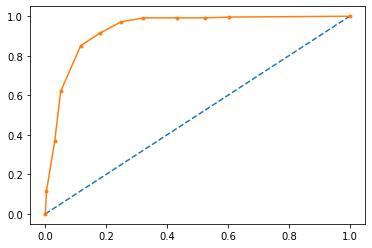

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = KNeighborsClassifier(n_neighbors=10)
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()